In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
import cv2
import os 
import numpy as np
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
img=image.load_img("image/train/COVID19/COVID19(0).jpg")

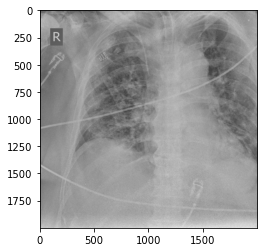

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("image/train/COVID19/COVID19(0).jpg").shape

(2000, 2000, 3)

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

In [6]:
train_generator = train_datagen.flow_from_directory(
        'image/train', 
        target_size=(150, 150),  
        batch_size=240, 
        class_mode='binary')

Found 1726 images belonging to 2 classes.


In [7]:
validation_generator = train_datagen.flow_from_directory(
        'image/validation',
        target_size=(150, 150),  
        batch_size=240,
        class_mode='binary')

Found 1726 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
from tensorflow.keras.optimizers import RMSprop

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [12]:
history = model.fit(
      train_generator,
      steps_per_epoch=1,  
      epochs=20,
      validation_data = validation_generator)

Epoch 1/20
1/1 [==============================] - 195s 195s/step - loss: 0.7164 - accuracy: 0.2625 - val_loss: 3.7793 - val_accuracy: 0.7335
Epoch 2/20
1/1 [==============================] - 113s 113s/step - loss: 3.8622 - accuracy: 0.7208 - val_loss: 0.8452 - val_accuracy: 0.2665
Epoch 3/20
1/1 [==============================] - 103s 103s/step - loss: 0.8492 - accuracy: 0.2542 - val_loss: 0.5160 - val_accuracy: 0.7335
Epoch 4/20
1/1 [==============================] - 104s 104s/step - loss: 0.5207 - accuracy: 0.7333 - val_loss: 0.4663 - val_accuracy: 0.7358
Epoch 5/20
1/1 [==============================] - 110s 110s/step - loss: 0.5111 - accuracy: 0.6833 - val_loss: 0.4004 - val_accuracy: 0.8540
Epoch 6/20
1/1 [==============================] - 108s 108s/step - loss: 0.4005 - accuracy: 0.9348 - val_loss: 0.9402 - val_accuracy: 0.7335
Epoch 7/20
1/1 [==============================] - 128s 128s/step - loss: 0.9146 - accuracy: 0.7417 - val_loss: 0.4304 - val_accuracy: 0.9311
Epoch 8/20
1/

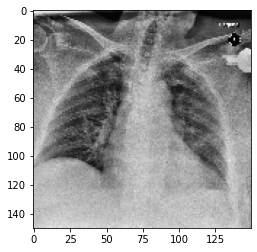

Covid detected


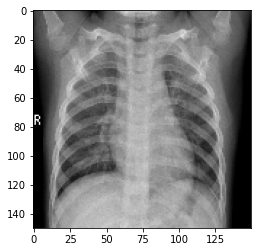

Normal


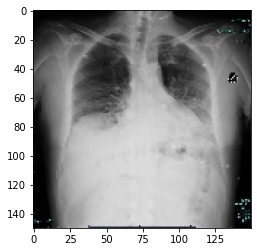

Covid detected


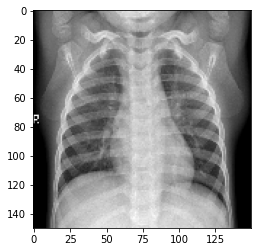

Normal


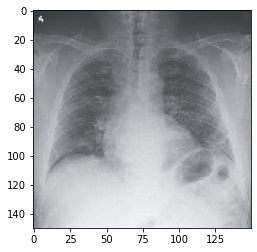

Covid detected


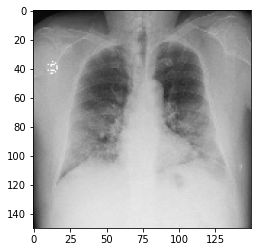

Covid detected


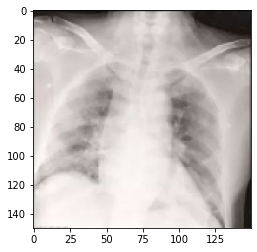

Covid detected


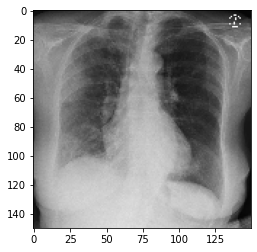

Covid detected


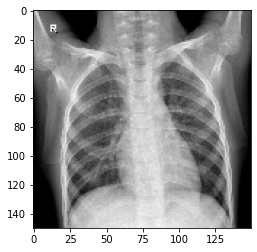

Normal


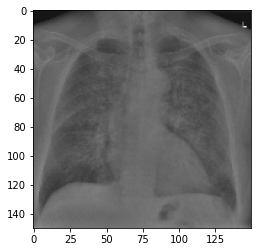

Covid detected


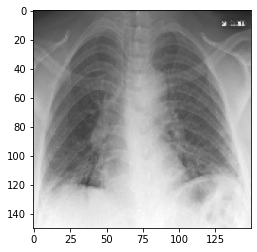

Covid detected


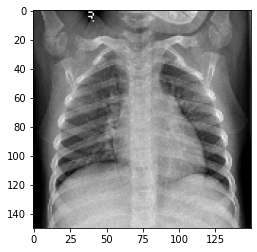

Normal


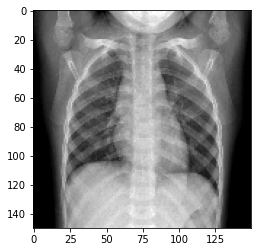

Normal


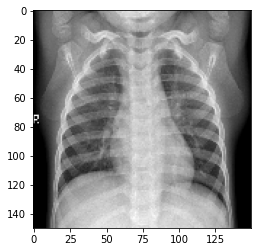

Normal


In [23]:
dir_path = "image/test"
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+ '//' + i , target_size=(150,150))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes =model.predict(images)
    if classes[0]==0:
        print("Covid detected")
 
    else:
        print("Normal")